Welcome to initial exploration of the dataset. I am going to present basic information and sentiment analysis with vader.

In [4]:
import os
import pandas as pd

base_input_path = 'data/tweets_data_final'
subfolders = ['Konfa', 'NL', 'PIS', 'PO', 'PL2050', 'PSL']
output_folder = 'data/tweets_data_combined'

os.makedirs(output_folder, exist_ok=True)

#processing subsfolders
for subfolder in subfolders:
    folder_path = os.path.join(base_input_path, subfolder)
    dataframes = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            politician = filename.split("_tweets.json")[0]
            try:
                df = pd.read_json(file_path)  # Use lines=True for line-delimited JSON
                df["username"] = politician  # Add a column for the politician's username
                df["party"] = subfolder
                print(f"Read {len(df)} rows from {file_path}")  # Print the number of rows read
                dataframes.append(df)
            except ValueError as e:
                print(f"Error reading {file_path}: {e}")
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        
        # Save combined DataFrame to a file
        output_file_path = os.path.join(output_folder, f'{subfolder}_combined.pkl')
        combined_df.to_pickle(output_file_path)  # You can also use .to_csv() for CSV format
        
        print(f"Saved {subfolder} combined data to {output_file_path}")

print("Processing complete!")

Read 950 rows from data/tweets_data_final/Konfa/Wlodek_Skalik_2023-10-16_2024-10-15.json
Read 721 rows from data/tweets_data_final/Konfa/SlawomirMentzen_2023-10-16_2024-10-15.json
Read 175 rows from data/tweets_data_final/Konfa/TudujKrzysztof_2023-10-16_2024-10-15.json
Read 964 rows from data/tweets_data_final/Konfa/bartlomiejpejo_2023-10-16_2024-10-15.json
Read 750 rows from data/tweets_data_final/Konfa/WTumanowicz_2023-10-16_2024-10-15.json
Saved Konfa combined data to data/tweets_data_combined/Konfa_combined.pkl
Read 457 rows from data/tweets_data_final/NL/RobertBiedron_2023-10-16_2024-10-15.json
Read 178 rows from data/tweets_data_final/NL/KGawkowski_2023-10-16_2024-10-15.json
Read 73 rows from data/tweets_data_final/NL/wlodekczarzasty_2023-10-16_2024-10-15.json
Read 0 rows from data/tweets_data_final/NL/DyduchMarek_2023-10-16_2024-10-15.json
Saved NL combined data to data/tweets_data_combined/NL_combined.pkl
Read 647 rows from data/tweets_data_final/PIS/MorawieckiM_2023-10-16_2024

In [5]:
df_konfa = pd.read_pickle(os.path.join(output_folder, 'Konfa_combined.pkl'))
df_NL = pd.read_pickle(os.path.join(output_folder, 'NL_combined.pkl'))
df_PIS = pd.read_pickle(os.path.join(output_folder, 'PIS_combined.pkl'))
df_PO = pd.read_pickle(os.path.join(output_folder, 'PO_combined.pkl'))
df_PL2050 = pd.read_pickle(os.path.join(output_folder, 'PL2050_combined.pkl'))
df_PSL = pd.read_pickle(os.path.join(output_folder, 'PSL_combined.pkl'))

In [6]:
df_konfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      3560 non-null   int64              
 1   possibly_sensitive      3560 non-null   bool               
 2   in_reply_to_user_id     726 non-null    float64            
 3   created_at              3560 non-null   datetime64[ns, UTC]
 4   referenced_tweets       1055 non-null   object             
 5   edit_controls           3560 non-null   object             
 6   entities                3281 non-null   object             
 7   text                    3560 non-null   object             
 8   public_metrics          3560 non-null   object             
 9   edit_history_tweet_ids  3560 non-null   object             
 10  reply_settings          3560 non-null   object             
 11  author_id               3560 non-null   int

In [7]:
df_konfa['id'].nunique()

3555

In [8]:
# Merge all dataframes into one
df = pd.concat([df_konfa, df_NL, df_PIS, df_PO, df_PL2050, df_PSL], ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11523 entries, 0 to 11522
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      11507 non-null  float64            
 1   possibly_sensitive      11507 non-null  object             
 2   in_reply_to_user_id     1888 non-null   float64            
 3   created_at              11523 non-null  datetime64[ns, UTC]
 4   referenced_tweets       3210 non-null   object             
 5   edit_controls           11507 non-null  object             
 6   entities                9861 non-null   object             
 7   text                    11523 non-null  object             
 8   public_metrics          11523 non-null  object             
 9   edit_history_tweet_ids  11507 non-null  object             
 10  reply_settings          11523 non-null  object             
 11  author_id               11523 non-null  f

In [10]:
df['id'].nunique()

11460

In [11]:
# Remove duplicates from the dataframe based on specific columns
df.drop_duplicates(subset=['id'], inplace=True)


In [12]:
# df_konfa.drop_duplicates(subset=['id'], inplace=True)
# df_NL.drop_duplicates(subset=['id'], inplace=True)
# df_PIS.drop_duplicates(subset=['id'], inplace=True)
# df_PO.drop_duplicates(subset=['id'], inplace=True)
# df_PL2050.drop_duplicates(subset=['id'], inplace=True)
# df_PSL.drop_duplicates(subset=['id'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11461 entries, 0 to 11521
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      11460 non-null  float64            
 1   possibly_sensitive      11460 non-null  object             
 2   in_reply_to_user_id     1878 non-null   float64            
 3   created_at              11461 non-null  datetime64[ns, UTC]
 4   referenced_tweets       3195 non-null   object             
 5   edit_controls           11460 non-null  object             
 6   entities                9821 non-null   object             
 7   text                    11461 non-null  object             
 8   public_metrics          11461 non-null  object             
 9   edit_history_tweet_ids  11460 non-null  object             
 10  reply_settings          11461 non-null  object             
 11  author_id               11461 non-null  float6

In [14]:
df.head()

,id,possibly_sensitive,in_reply_to_user_id,created_at,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,author_id,lang,conversation_id,category,context_annotations,attachments,geo,username,party
0,1.846268e+18,False,509272614.0,2024-10-15 19:11:46+00:00,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,1.187749e+18,pl,1.846156e+18,Reply,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
1,1.846265e+18,False,NaN,2024-10-15 18:59:59+00:00,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,1.187749e+18,pl,1.846265e+18,Original,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
2,1.846263e+18,False,955239446.0,2024-10-15 18:51:42+00:00,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,1.187749e+18,pl,1.846128e+18,Reply,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
3,1.846261e+18,False,NaN,2024-10-15 18:46:20+00:00,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 h...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,1.187749e+18,pl,1.846261e+18,Quote,"[{'domain': {'id': '10', 'name': 'Person', 'de...",NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
4,1.846105e+18,False,NaN,2024-10-15 08:24:33+00:00,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌Kilka dni temu zagłosowałem za odwołaniem Krz...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,1.187749e+18,pl,1.846105e+18,Original,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",{'media_keys': ['3_1846104848942432256']},NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa


In [15]:
# Update the 'username' column to keep only the string until '_2'
df['username'] = df['username'].str.split('_2').str[0]

In [16]:
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category
Original    8235
Reply       1852
Quote       1370
Retweet        4
Name: count, dtype: int64
Total tweets: 11461


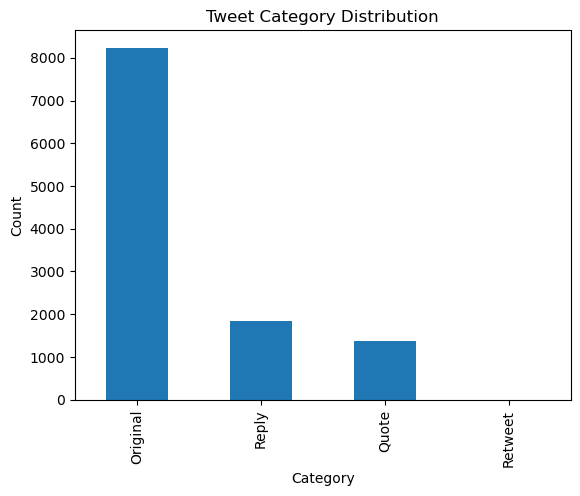

In [17]:
import matplotlib.pyplot as plt

# Plot the category summary as a bar plot
category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

Top 10 active users

In [18]:
top_ten_users = df['username'].value_counts().head(10)
print(top_ten_users)

username
PatrykJaki         1023
bartlomiejpejo      963
Wlodek_Skalik       949
mwojcik_            781
WTumanowicz         749
SlawomirMentzen     720
MorawieckiM         646
BeataSzydlo         555
OklaDrewnowicz      455
RobertBiedron       452
Name: count, dtype: int64


Top 10 active users (only original posts)

In [19]:
# Filter the dataframe to include only original posts
original_posts_df = df[df['category'] == 'Original']

# Get the top ten users based on the number of original posts
top_ten_original_users = original_posts_df['username'].value_counts().head(10)
print(top_ten_original_users)

username
bartlomiejpejo     835
mwojcik_           646
PatrykJaki         638
MorawieckiM        563
SlawomirMentzen    556
Wlodek_Skalik      521
BeataSzydlo        510
WTumanowicz        490
KosiniakKamysz     403
RobertBiedron      388
Name: count, dtype: int64


the most active user from each party

In [20]:
most_active_users = df.groupby('party')['username'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'username']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'username'])
print(most_active_users_with_counts)

    party        username  counts
0   Konfa  bartlomiejpejo     963
1      NL   RobertBiedron     452
2     PIS      PatrykJaki    1023
3  PL2050     Kpelczynska     225
4      PO  OklaDrewnowicz     455
5     PSL  KosiniakKamysz     408


In [21]:
most_active_users = original_posts_df.groupby('party')['username'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'username']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'username'])
print(most_active_users_with_counts)


    party        username  counts
0   Konfa  bartlomiejpejo     963
1      NL   RobertBiedron     452
2     PIS        mwojcik_     781
3  PL2050     Kpelczynska     225
4      PO      donaldtusk     337
5     PSL  KosiniakKamysz     408


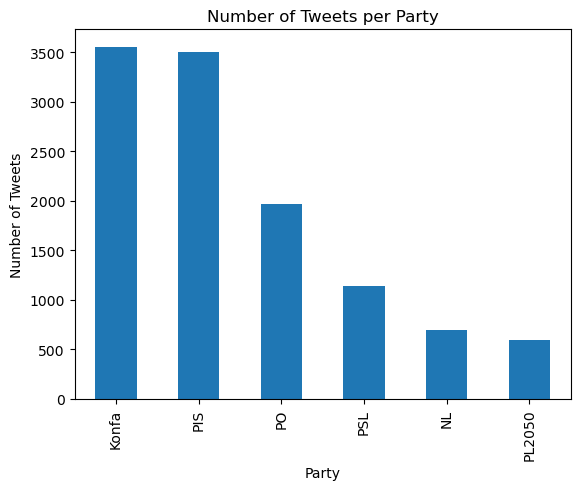

In [22]:
import matplotlib.pyplot as plt

# Group by party and count the number of tweets
tweets_per_party = df['party'].value_counts()

# Plot the data
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.show()

In [23]:
# Ensure the created_at column is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Set the created_at column as the index
df.set_index('created_at', inplace=True)

Spike around euroelection

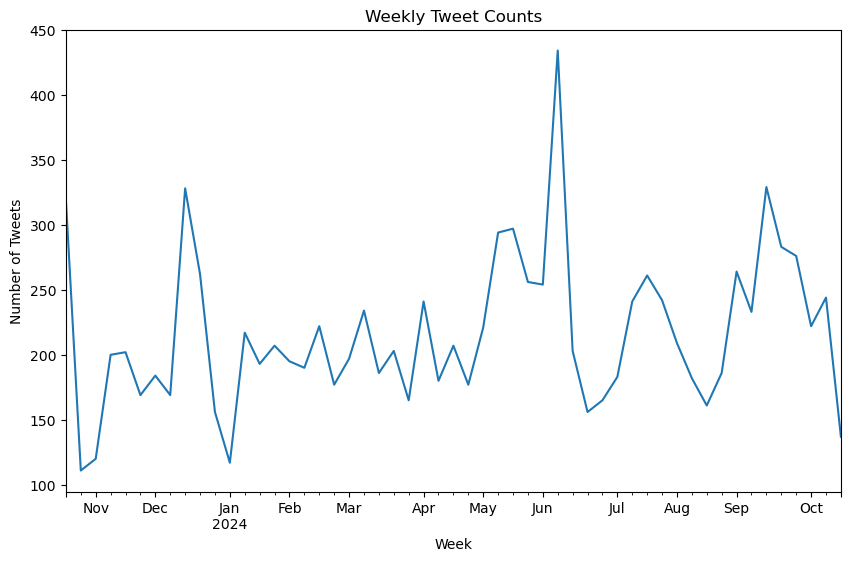

In [24]:


# Resample the data weekly and count the number of tweets per week
weekly_tweets = df.resample('W').size()

# Plot the weekly tweet counts
weekly_tweets.plot(kind='line', figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts')
plt.show()

Interesting to see that after the election PO was most active and PiS not to much.

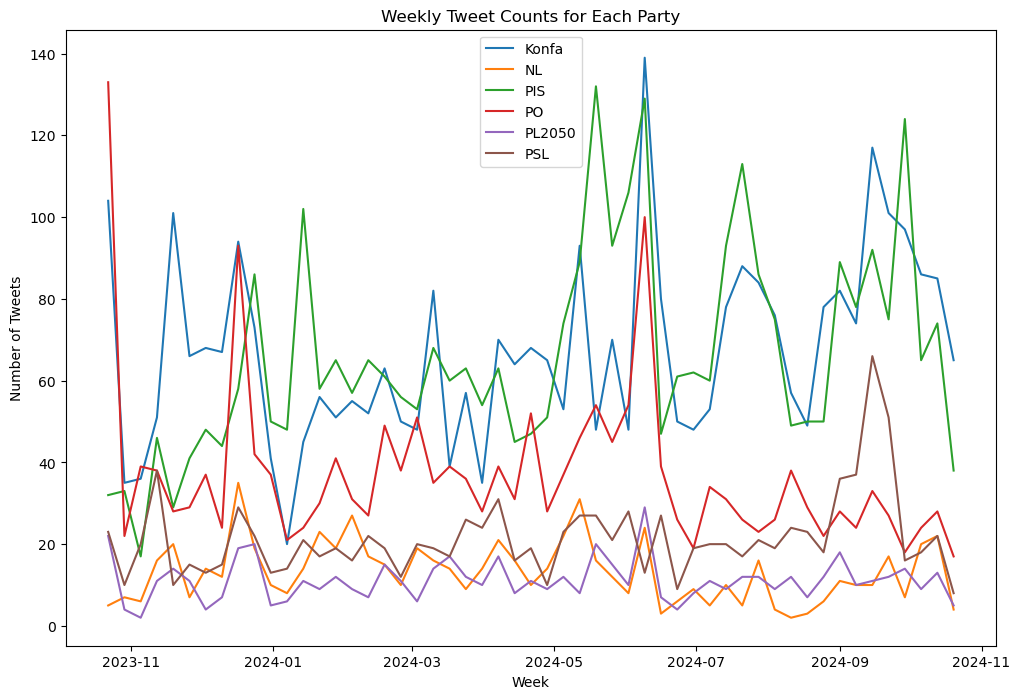

In [25]:
parties = df['party'].unique()

# Plot weekly tweet counts for each party on one plot
plt.figure(figsize=(12, 8))

for party in parties:
    party_df = df[df['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)

plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')
plt.legend()
plt.show()

New column with text encoded as utf-8

In [26]:
# Create a new column 'text_utf' where 'text' is encoded as utf-8
df['text_utf'] = df['text'].apply(lambda x: x.encode('utf-8'))

adding spaces between emojis

In [27]:
import re
import emoji
def add_space_around_emojis(text):
    return ''.join(f' {char} ' if char in emoji.EMOJI_DATA or re.match(r'[\U0001F1E6-\U0001F1FF]', char) else char for char in text)

df['text'] = df['text'].apply(add_space_around_emojis)
def clean_text(text):
    # Remove mentions and links
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    # Ensure there is a space before and after each emoji
    text = re.sub(r'(?<!\s)([\U0001F600-\U0001F64F])', r' \1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F])(?!\s)', r'\1 ', text)
    return text

df['text_clean'] = df['text'].apply(clean_text)

After deleting values with links only we got 200 posts less

Number of words per party - WYFILTROWAC @ I LINKI - potencjalnie. 
done
emoji oddzielone o jedną spację zawsze

In [28]:
# Ensure there is a space before and after each emoji in the 'text_utf' column
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))

# Group by party and calculate the summary statistics for word count
word_count_summary = df.groupby('party')['word_count'].describe()
print(word_count_summary)

         count       mean        std  min   25%   50%   75%   max
party                                                            
Konfa   3555.0  22.652321  13.885964  0.0  10.0  21.0  36.0  52.0
NL       700.0  21.982857  13.079913  0.0  11.0  21.0  34.0  48.0
PIS     3504.0  23.944635  14.156251  0.0  11.0  25.0  37.0  56.0
PL2050   592.0  26.369932  14.489040  0.0  13.0  30.0  39.0  55.0
PO      1970.0  18.839086  13.500973  0.0   6.0  16.0  31.0  68.0
PSL     1140.0  26.334211  12.635279  0.0  16.0  30.0  37.0  53.0


Median number of words per user user party

In [29]:
# Group by party, username, and category, then calculate the median word count for each user
user_word_count_summary = df.groupby(['party', 'username', 'category'])['word_count'].mean().reset_index()

# Group by party and category, then calculate the median word count for each party
party_user_word_count_summary = user_word_count_summary.groupby(['party', 'category'])['word_count'].mean().reset_index()

print(party_user_word_count_summary)
user_word_count_summary = df.groupby(['party', 'username'])['word_count'].mean().reset_index()

# Group by party and calculate the mean word count for each party
party_user_word_count_summary = user_word_count_summary.groupby('party')['word_count'].mean().reset_index()

print(party_user_word_count_summary)

     party  category  word_count
0    Konfa  Original   27.034042
1    Konfa     Quote   15.506145
2    Konfa     Reply   12.286328
3       NL  Original   22.548813
4       NL     Quote   12.647833
5       NL     Reply    5.743328
6      PIS  Original   26.339614
7      PIS     Quote   20.866991
8      PIS     Reply   21.086581
9   PL2050  Original   28.630960
10  PL2050     Quote   17.159559
11  PL2050     Reply   16.436756
12      PO  Original   24.087010
13      PO     Quote   13.931268
14      PO     Reply   11.201239
15     PSL  Original   27.467039
16     PSL     Quote   15.034480
17     PSL     Reply   19.357247
18     PSL   Retweet   17.250000
    party  word_count
0   Konfa   22.445324
1      NL   19.094989
2     PIS   25.171355
3  PL2050   25.079791
4      PO   19.843750
5     PSL   23.852465


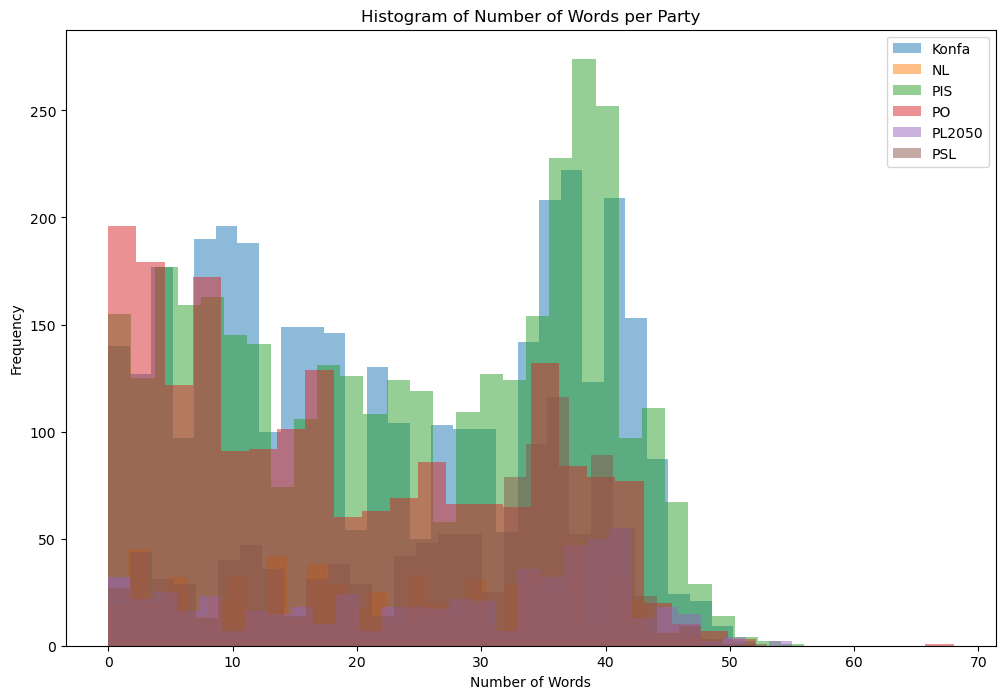

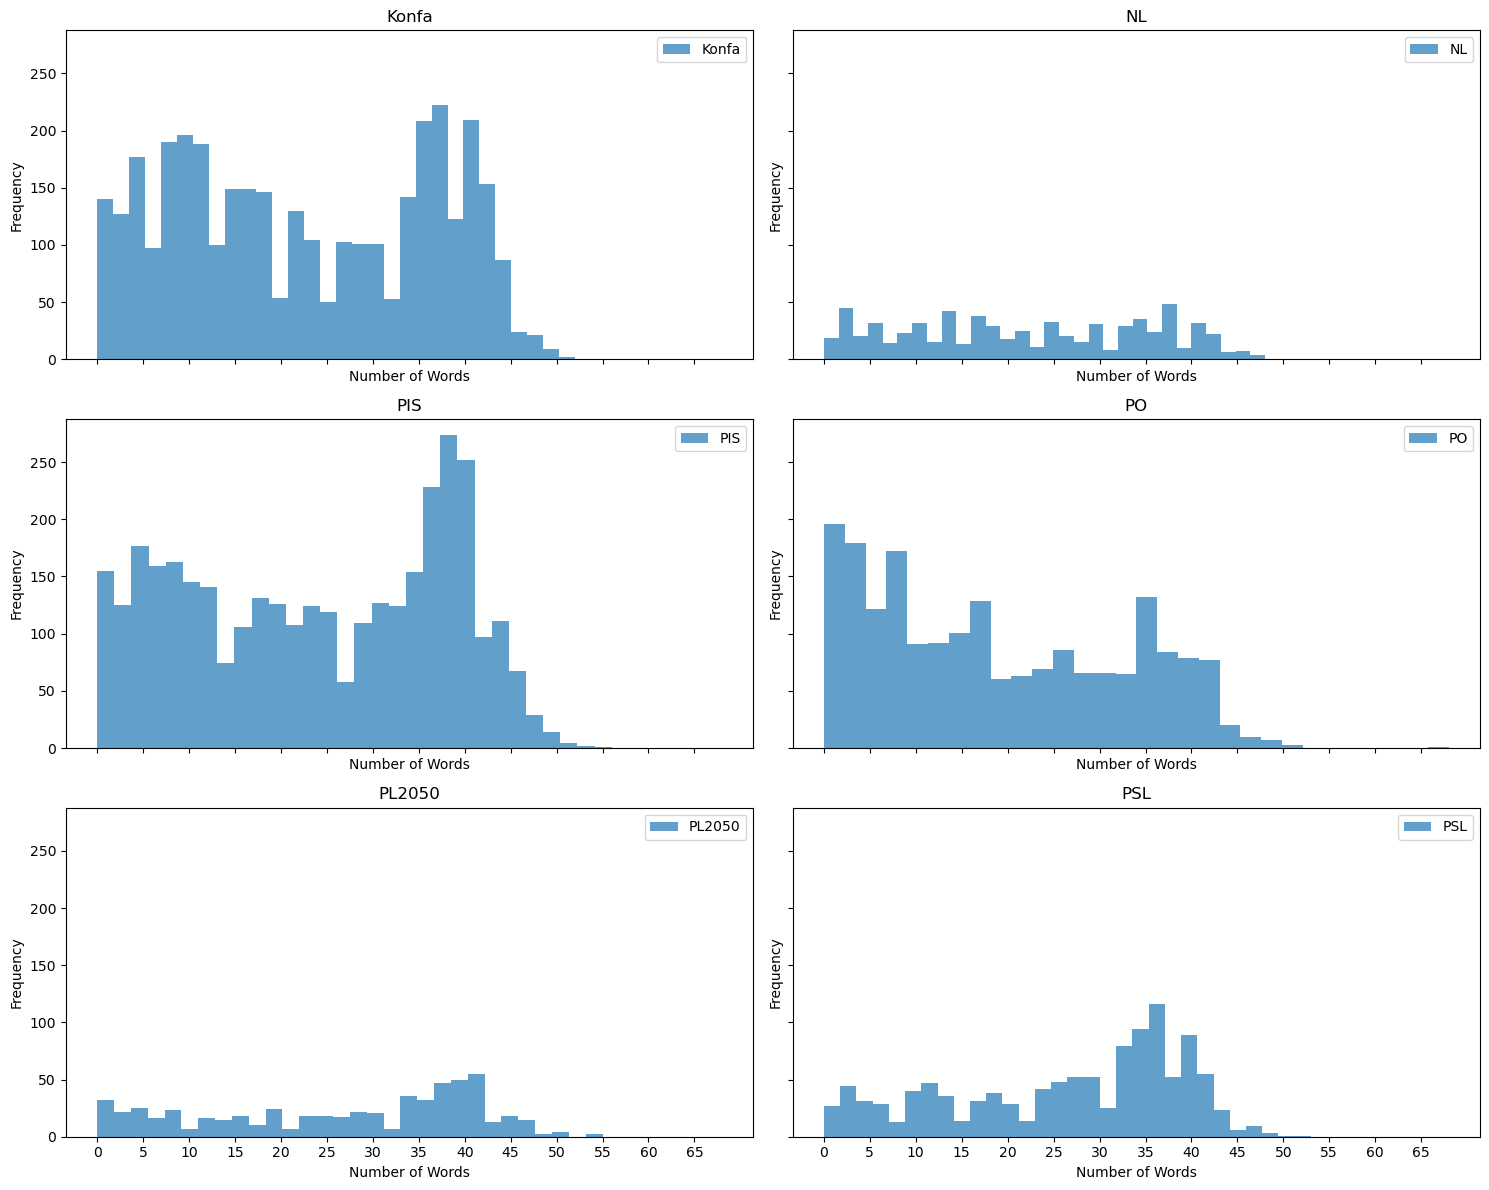

In [30]:
import matplotlib.pyplot as plt

# Create histograms for the number of words per party
parties = df['party'].unique()
plt.figure(figsize=(12, 8))

for party in parties:
    plt.hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.5, label=party)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Party')
plt.legend()
plt.show()
# Create individual histograms for each party
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, party in enumerate(parties):
    axes[i].hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.7, label=party)
    axes[i].set_title(f'{party}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_xticks(range(0, df['word_count'].max() + 1, 5))  # Set x-axis scale

plt.tight_layout()
plt.show()


In [31]:
# Calculate the number of characters in each post
df['char_count'] = df['text_clean'].apply(len)

# Group by party and category, then calculate the average number of characters
char_count_summary = df.groupby(['party', 'category'])['char_count'].mean().reset_index()

# Rename the columns for clarity
char_count_summary.columns = ['party', 'category', 'average_char_count']

# Display the summary
print(char_count_summary)

     party  category  average_char_count
0    Konfa  Original          182.997987
1    Konfa     Quote          109.893733
2    Konfa     Reply           87.210227
3       NL  Original          169.507092
4       NL     Quote           84.557377
5       NL     Reply           52.880000
6      PIS  Original          169.256213
7      PIS     Quote          165.505837
8      PIS     Reply          117.807087
9   PL2050  Original          208.954751
10  PL2050     Quote          134.915254
11  PL2050     Reply           76.472527
12      PO  Original          164.323802
13      PO     Quote           88.828054
14      PO     Reply           62.885714
15     PSL  Original          217.084146
16     PSL     Quote          103.013514
17     PSL     Reply          125.404762
18     PSL   Retweet           98.250000


In [32]:
import emoji

# Create a function to count emojis in a text
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

# Add the 'emoji_count' column to the dataframe
df['emoji_count'] = df['text_clean'].apply(count_emojis)

# Calculate the total number of emojis in the 'text' column per unique value in the 'party' column
emoji_counts_per_party = df.groupby('party')['emoji_count'].sum().reset_index()
emoji_counts_per_party.columns = ['party', 'total_emoji_count']

print(emoji_counts_per_party)
# Calculate the average number of emojis per post for each party
average_emoji_per_post_per_party = df.groupby('party')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_party.columns = ['party', 'average_emoji_per_post']

print(average_emoji_per_post_per_party)

    party  total_emoji_count
0   Konfa               1696
1      NL                727
2     PIS               1390
3  PL2050                121
4      PO               1709
5     PSL                811
    party  average_emoji_per_post
0   Konfa                0.477075
1      NL                1.038571
2     PIS                0.396689
3  PL2050                0.204392
4      PO                0.867513
5     PSL                0.711404


In [33]:
# Extract public metrics into separate columns
df['retweet_count'] = df['public_metrics'].apply(lambda x: x['retweet_count'])
df['reply_count'] = df['public_metrics'].apply(lambda x: x['reply_count'])
df['like_count'] = df['public_metrics'].apply(lambda x: x['like_count'])
df['quote_count'] = df['public_metrics'].apply(lambda x: x['quote_count'])

# Group by party and calculate the sum of each metric
public_metrics_summary = df.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

# Get the total number of posts for each party
total_posts_per_party = df['party'].value_counts().reset_index()
total_posts_per_party.columns = ['party', 'total_posts']

# Merge the public metrics summary with the total posts per party
public_metrics_summary = public_metrics_summary.merge(total_posts_per_party, on='party')

# Normalize the metrics per number of posts
public_metrics_summary['retweet_count_per_post'] = public_metrics_summary['retweet_count'] / public_metrics_summary['total_posts']
public_metrics_summary['reply_count_per_post'] = public_metrics_summary['reply_count'] / public_metrics_summary['total_posts']
public_metrics_summary['like_count_per_post'] = public_metrics_summary['like_count'] / public_metrics_summary['total_posts']
public_metrics_summary['quote_count_per_post'] = public_metrics_summary['quote_count'] / public_metrics_summary['total_posts']

print(public_metrics_summary[['party', 'retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']])

    party  retweet_count_per_post  reply_count_per_post  like_count_per_post  \
0   Konfa               52.355274             64.246132           782.412940   
1      NL               25.692857             89.512857           342.064286   
2     PIS              299.674943            384.872146          1088.127854   
3  PL2050               93.248311            369.371622          1149.081081   
4      PO              343.383756            459.712690          2599.544670   
5     PSL               39.607895            182.473684           393.575439   

   quote_count_per_post  
0              4.548523  
1              6.465714  
2             16.163242  
3             21.464527  
4             39.680203  
5             10.243860  


In [34]:
# Create a new dataframe with 'id' and 'text_clean' columns
df_clean_text = df[['id', 'text_clean']]

# Export the dataframe to a CSV file
df_clean_text.to_csv('clean_text_data.csv', index=False)

ID ZAPISUJE SIE JAKO FLOAT I NIE ODCZYTIJE SIE DOBRZE Z CSV STAD ZMIANA NA STRING

In [35]:
# Read the clean_text_data.csv file into a DataFrame
df_clean_text = pd.read_csv('data/clean_text_en.csv', dtype={'id': str})

# Display the first few rows of the DataFrame
df_clean_text.head()


,id,text_clean,text_clean_en
0,1.84626774302233e+18,"""Ani kroku wstecz!"" - w przód też żadnego jak...","""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,Właśnie zadzwonił do mnie nieznany numer. Już ...,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,"Czy ""jeszcze cięższa praca"" przełoży się na r...","Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,Polecam się zapoznać z treścią konferencji 👇,I recommend reading the content of the confere...
4,1.8461048658290156e+18,❌ Kilka dni temu zagłosowałem za odwołani...,"❌ A few days ago, I voted to dismiss Krzysz..."


In [36]:
# Change the type of 'id' column to float
df['id'] = df['id'].astype('string')

In [37]:
# Ensure the 'text_clean_en' column exists in df_clean_text
if 'text_clean_en' in df_clean_text.columns:
    # Merge the 'text_clean_en' column from df_clean_text to df based on the 'id' column
    df = df.merge(df_clean_text[['id', 'text_clean_en']], on='id', how='left')

    # Display the first few rows of the updated dataframe to verify the merge
    display(df.head())
else:
    print("Column 'text_clean_en' does not exist in df_clean_text")


,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,text_utf,text_clean,word_count,char_count,emoji_count,retweet_count,reply_count,like_count,quote_count,text_clean_en
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,"b'@Dariusz_Jonski ""Ani kroku wstecz!"" - w prz\...","""Ani kroku wstecz!"" - w przód też żadnego jak...",12,67,0,0,1,13,0,"""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,b'W\xc5\x82a\xc5\x9bnie zadzwoni\xc5\x82 do mn...,Właśnie zadzwonił do mnie nieznany numer. Już ...,23,147,0,28,9,418,0,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,"b'@KosiniakKamysz Czy ""jeszcze ci\xc4\x99\xc5\...","Czy ""jeszcze cięższa praca"" przełoży się na r...",14,109,0,4,1,38,0,"Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,b'Polecam si\xc4\x99 zapozna\xc4\x87 z tre\xc5...,Polecam się zapoznać z treścią konferencji 👇,7,47,1,9,2,48,0,I recommend reading the content of the confere...
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,b'\xe2\x9d\x8cKilka dni temu zag\xc5\x82osowa\...,❌ Kilka dni temu zagłosowałem za odwołaniem K...,36,282,2,30,0,141,0,"❌ A few days ago, I voted to dismiss Krzysz..."


In [38]:
# Display the breakdown of average emoji usage per party
average_emoji_per_post_per_party.set_index('party', inplace=True)
print(average_emoji_per_post_per_party)

        average_emoji_per_post
party                         
Konfa                 0.477075
NL                    1.038571
PIS                   0.396689
PL2050                0.204392
PO                    0.867513
PSL                   0.711404


In [39]:
# Replace '#VALUE!' with NaN in 'text_clean_en' column
df['text_clean_en'].replace('#VALUE!', pd.NA, inplace=True)

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/373191452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text_clean_en'].replace('#VALUE!', pd.NA, inplace=True)


In [40]:
df['text_clean_en_demojized'] = df['text_clean_en'].apply(lambda x: emoji.demojize(str(x)) if pd.notnull(x) else x)

df[['text_clean_en', 'text_clean_en_demojized']].head()

,text_clean_en,text_clean_en_demojized
0,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw..."
1,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...
2,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu..."
3,I recommend reading the content of the confere...,I recommend reading the content of the confere...
4,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis..."


SENTIMENT ANALYSIS

In [41]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mateuszpliszka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mateuszpliszka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
# Create a new dataframe where there are no NA values for 'text_clean_en'
df_no_na = df[df['text_clean_en'].notna()]

# Display the first few rows of the new dataframe to verify
df_no_na.head()

,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,text_clean,word_count,char_count,emoji_count,retweet_count,reply_count,like_count,quote_count,text_clean_en,text_clean_en_demojized
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,"""Ani kroku wstecz!"" - w przód też żadnego jak...",12,67,0,0,1,13,0,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,Właśnie zadzwonił do mnie nieznany numer. Już ...,23,147,0,28,9,418,0,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,"Czy ""jeszcze cięższa praca"" przełoży się na r...",14,109,0,4,1,38,0,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,Polecam się zapoznać z treścią konferencji 👇,7,47,1,9,2,48,0,I recommend reading the content of the confere...,I recommend reading the content of the confere...
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,❌ Kilka dni temu zagłosowałem za odwołaniem K...,36,282,2,30,0,141,0,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis..."


In [43]:
res = {}

for i, row in tqdm(df_no_na.iterrows(), total=len(df_no_na)):
    text = row['text_clean_en_demojized']
    myID = row['id']
    res[myID] = sia.polarity_scores(text)


  0%|          | 0/11268 [00:00<?, ?it/s]

In [45]:
vader_res = pd.DataFrame.from_dict(res, orient='index').reset_index()

vader_res.rename(columns={'index': 'id'}, inplace=True)

vader_res.head()

,id,neg,neu,pos,compound
0,1.84626774302233e+18,0.000,1.000,0.000,0.0000
1,1.8462647773471176e+18,0.000,0.949,0.051,0.0772
2,1.8462626933945882e+18,0.000,0.867,0.133,0.3818
3,1.8462613413274463e+18,0.000,0.737,0.263,0.3612
4,1.8461048658290156e+18,0.161,0.803,0.036,-0.6705


In [46]:
vader_res.iloc[:, 1:5].mean()

neg         0.068183
neu         0.781232
pos         0.150496
compound    0.166108
dtype: float64

In [47]:
# Merge the values from vader_res to df_no_na by 'id'
df_no_na = df_no_na.merge(vader_res, on='id', how='left')

# Display the first few rows of the updated dataframe to verify the merge
df_no_na.head()

,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,retweet_count,reply_count,like_count,quote_count,text_clean_en,text_clean_en_demojized,neg,neu,pos,compound
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,0,1,13,0,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw...",0.000,1.000,0.000,0.0000
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,28,9,418,0,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...,0.000,0.949,0.051,0.0772
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,4,1,38,0,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu...",0.000,0.867,0.133,0.3818
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,9,2,48,0,I recommend reading the content of the confere...,I recommend reading the content of the confere...,0.000,0.737,0.263,0.3612
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,30,0,141,0,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis...",0.161,0.803,0.036,-0.6705


In [48]:
# Group by party and calculate the mean of sentiment scores
sentiment_summary = df_no_na.groupby('party')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()

# Display the sentiment summary
print(sentiment_summary)

    party       neg       neu       pos  compound
0   Konfa  0.073070  0.790602  0.136330  0.112379
1      NL  0.052763  0.796019  0.151207  0.226721
2     PIS  0.091994  0.794124  0.113882  0.023458
3  PL2050  0.048293  0.745998  0.205707  0.345603
4      PO  0.044884  0.754985  0.199630  0.294908
5     PSL  0.042397  0.768715  0.188879  0.402433


In [49]:
# Print the 10 posts with the highest negative sentiment values
top_negative_posts = df_no_na[df_no_na['word_count'] >= 3].nlargest(10, 'neg')[['id', 'text_clean_en', 'neg']]
print(top_negative_posts)

                          id  \
8913   1.798377262099923e+18   
8849  1.8104054846686006e+18   
3027  1.8028075109124465e+18   
6720  1.8074193914090127e+18   
5623  1.8284685389080456e+18   
7456  1.7987221916909568e+18   
600   1.7573868979056643e+18   
823   1.7187360763558344e+18   
3479  1.7186299120372372e+18   
9028  1.7598396933932365e+18   

                                          text_clean_en    neg  
8913                         Shamelessness and villainy  0.857  
8849   Search No. 2, The world of hatred, lies and v...  0.681  
3027                   The Internet takes no prisoners!  0.659  
6720               \n\nNasty government with no future.  0.659  
5623                                      Hate speech 👇  0.649  
7456                             A POLISH SOLDIER DIED.  0.643  
600       \n\nThere is no shortage of ignorant peopl...  0.640  
823                Unfortunately, it doesn't look good.  0.616  
3479            Stop mass and uncontrolled immigration!  0.600

Deleting rows with less than 3 words. Around 700 posts less.

In [50]:
# Filter the dataframe to include only rows where the 'text_clean_en' column has 3 words or more
df_filtered = df_no_na[df_no_na['text_clean_en'].apply(lambda x: len(str(x).split()) >= 3)]

# Display the first few rows of the new dataframe to verify
df_filtered.head()

,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,retweet_count,reply_count,like_count,quote_count,text_clean_en,text_clean_en_demojized,neg,neu,pos,compound
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,0,1,13,0,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw...",0.000,1.000,0.000,0.0000
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,28,9,418,0,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...,0.000,0.949,0.051,0.0772
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,4,1,38,0,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu...",0.000,0.867,0.133,0.3818
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,9,2,48,0,I recommend reading the content of the confere...,I recommend reading the content of the confere...,0.000,0.737,0.263,0.3612
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,30,0,141,0,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis...",0.161,0.803,0.036,-0.6705


/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/109867607.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans.labels_


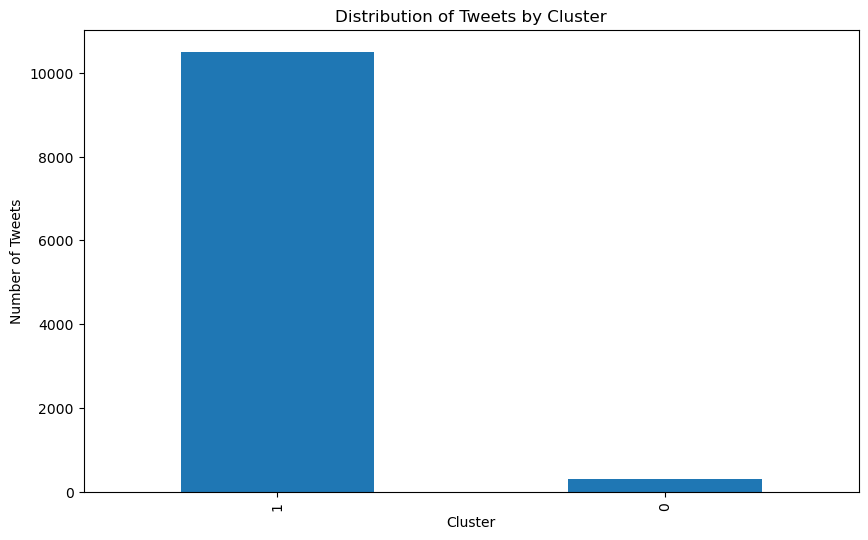

In [51]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_filtered['text_clean_en_demojized'].dropna())

# Perform KMeans clustering
num_clusters = 2  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataframe
df_filtered['cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
df_filtered[['text_clean_en_demojized', 'cluster']].head()

# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
df_filtered['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets by Cluster')
plt.show()

In [52]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax



def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)
text = "Covid cases are increasing fast!"

text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)
# text = "Covid cases are increasing fast!"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1) negative 0.7236
2) neutral 0.2287
3) positive 0.0477


In [56]:
def bert_predict(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

In [53]:
df_filtered['text_bert'] = df_filtered['text_clean_en_demojized'].apply(preprocess)

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/274361585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['text_bert'] = df_filtered['text_clean_en_demojized'].apply(preprocess)


In [67]:
pd.set_option('display.max_colwidth', None)

df_filtered[['negative', 'neutral', 'positive']] = df_filtered['text_bert'].apply(lambda x: pd.Series(bert_predict(x), index=['negative', 'neutral', 'positive']))

df_filtered.iloc[0:9][['text_bert', 'negative', 'neutral', 'positive']]

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/3614085444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['negative', 'neutral', 'positive']] = df_filtered['text_bert'].apply(lambda x: pd.Series(bert_predict(x), index=['negative', 'neutral', 'positive']))


,text_bert,negative,neutral,positive
0,"""Not a step back!"" - you haven't put any forward either so far.",0.383399,0.542734,0.073867
1,An unknown number just called me. I thought it was the doctor who wanted to ask about my well-being.\n\nIt turned out that it was photovoltaics.,0.481302,0.484627,0.034071
2,"Will ""even harder work"" translate into the fulfillment of at least some of the election promises you made?",0.484032,0.475687,0.040281
3,I recommend reading the content of the conference :backhand_index_pointing_down:,0.012379,0.566814,0.420807
4,":cross_mark: A few days ago, I voted to dismiss Krzysztof Czabański from the position of member of the National Media Council.\n :backhand_index_pointing_right: It is worth reminding how unequal the fight we fought during the last parliamentary elections. \nApart from preventing the Confederation from accessing public media, it is difficult…",0.463204,0.519633,0.017163
5,"🇵 🇱 Another term of #PO and once again they are trying to block the #IndependenceMarch. If they do not go with us, we will go in spite of them! Just don't extinguish the spirit!",0.751366,0.231580,0.017054
6,":hear-no-evil_monkey: The propaganda of success has spread so much that even when they lose local elections to their own coalition partner, they feel like winners :see-no-evil_monkey:",0.402109,0.457339,0.140552
7,"On Sunday, October 13, at 3:45 p.m. in the Parish of Blessed Czesław in Opole at ul. Hallera 2, the Gietrzwałd Chapel was consecrated - one of 150 chapels built in Poland for the 150th anniversary of the Gietrzwałd apparitions.",0.006766,0.866456,0.126778
8,40 years have passed like one day! :revolving_hearts:,0.140323,0.404087,0.455589


In [70]:
# Calculate the average values for neg, neu, pos, compound, negative, neutral, and positive per party
sentiment_breakdown = df_filtered.groupby('party')[['neg', 'neu', 'pos', 'compound', 'negative', 'neutral', 'positive']].mean().reset_index()

# Display the sentiment breakdown
print(sentiment_breakdown)

    party       neg       neu       pos  compound  negative   neutral  \
0   Konfa  0.073926  0.796975  0.129101  0.110166  0.310858  0.412865   
1      NL  0.055219  0.797344  0.147425  0.230251  0.208479  0.358382   
2     PIS  0.093203  0.791847  0.114949  0.023650  0.414411  0.368972   
3  PL2050  0.049716  0.779960  0.170322  0.348035  0.162905  0.386512   
4      PO  0.047251  0.755426  0.197332  0.312095  0.171030  0.332379   
5     PSL  0.042197  0.778115  0.179679  0.408941  0.117255  0.352841   

   positive  
0  0.276277  
1  0.433139  
2  0.216617  
3  0.450583  
4  0.496591  
5  0.529904  


In [74]:
# Display the 10 most negative tweets
most_negative_tweets = df_filtered.nlargest(10, 'negative')[[ 'text_clean_en', 'negative']]
print("10 Most Negative Tweets:")
print(most_negative_tweets)

# Display the 10 most positive tweets
most_positive_tweets = df_filtered.nlargest(10, 'positive')[[ 'text_clean_en', 'positive']]
print("\n10 Most Positive Tweets:")
print(most_positive_tweets)

10 Most Negative Tweets:
                                                                                                                                                                                                    text_clean_en  \
6487                                                                     The economy is sinking, the judiciary is sinking, and Polish science is also sinking. The government losers are destroying the country.    
960   We have the worst tax system in the EU! It is not the fault of dwarves, beavers or the water vein in Poland. It is the fault of Polish parliamentarians who create this tax hell for Polish entrepreneurs!    
6587                                                                        These government losers do not protect Polish rivers and lakes. Hundreds of tons of dead fish! This power is like mercury for Poland.   
5518                                                                                                                       

In [76]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

text = "your text here"

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

model = AutoModelForSequenceClassification.from_pretrained("bucketresearch/politicalBiasBERT")


inputs = tokenizer(text, return_tensors="pt")
labels = torch.tensor([0])
outputs = model(**inputs, labels=labels)
loss, logits = outputs[:2]

# [0] -> left 
# [1] -> center
# [2] -> right
print(logits.softmax(dim=-1)[0].tolist())

model.safetensors:  19%|#9        | 83.9M/433M [00:00<?, ?B/s]

[0.22827006876468658, 0.29714715480804443, 0.47458282113075256]


In [77]:
def get_bias_score(text):
    inputs = tokenizer(text, return_tensors="pt")
    labels = torch.tensor([0])
    outputs = model(**inputs, labels=labels)
    loss, logits = outputs[:2]
    return logits.softmax(dim=-1)[0].tolist()   

In [79]:
df_filtered['text_bert_bias'] = df_filtered['text_clean_en_demojized'].apply(get_bias_score)

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/4054673994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['text_bert_bias'] = df_filtered['text_clean_en_demojized'].apply(get_bias_score)


In [80]:
# Extract values as left, center, right from 'text_bert_bias' column
df_filtered[['left', 'center', 'right']] = pd.DataFrame(df_filtered['text_bert_bias'].tolist(), index=df_filtered.index)

# Display the first few rows to verify the extraction
df_filtered[['text_clean_en_demojized', 'left', 'center', 'right']].head()

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/2714050964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['left', 'center', 'right']] = pd.DataFrame(df_filtered['text_bert_bias'].tolist(), index=df_filtered.index)
/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/2714050964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['left', 'center', 'right']] = pd.DataFrame(df_filtered['text_bert_bias'].tolist(), index=df_filtered.index)
/var/folders/4

,text_clean_en_demojized,left,center,right
0,"""Not a step back!"" - you haven't put any forward either so far.",0.305622,0.175898,0.518480
1,An unknown number just called me. I thought it was the doctor who wanted to ask about my well-being.\n\nIt turned out that it was photovoltaics.,0.251908,0.128170,0.619922
2,"Will ""even harder work"" translate into the fulfillment of at least some of the election promises you made?",0.397169,0.237391,0.365440
3,I recommend reading the content of the conference :backhand_index_pointing_down:,0.374031,0.158103,0.467865
4,":cross_mark: A few days ago, I voted to dismiss Krzysztof Czabański from the position of member of the National Media Council.\n :backhand_index_pointing_right: It is worth reminding how unequal the fight we fought during the last parliamentary elections. \nApart from preventing the Confederation from accessing public media, it is difficult…",0.317064,0.195270,0.487666


In [82]:
# Group by party and calculate the mean of sentiment scores and bias scores
sentiment_summary = df_filtered.groupby('party')[['neg', 'neu', 'pos', 'compound', 'negative', 'neutral', 'positive', 'left', 'center', 'right']].mean().reset_index()

# Group by party and calculate the total number of tweets
tweets_per_party = df_filtered['party'].value_counts().reset_index()
tweets_per_party.columns = ['party', 'total_tweets']

# Merge the sentiment summary with the total tweets per party
party_breakdown = sentiment_summary.merge(tweets_per_party, on='party')

# Display the party breakdown
print(party_breakdown)

    party       neg       neu       pos  compound  negative   neutral  \
0   Konfa  0.073926  0.796975  0.129101  0.110166  0.298641  0.268310   
1      NL  0.055219  0.797344  0.147425  0.230251  0.275133  0.304806   
2     PIS  0.093203  0.791847  0.114949  0.023650  0.310125  0.261677   
3  PL2050  0.049716  0.779960  0.170322  0.348035  0.284037  0.298830   
4      PO  0.047251  0.755426  0.197332  0.312095  0.301643  0.255524   
5     PSL  0.042197  0.778115  0.179679  0.408941  0.265065  0.353074   

   positive      left    center     right  total_tweets  
0  0.433049  0.298641  0.268310  0.433049          3390  
1  0.420061  0.275133  0.304806  0.420061           666  
2  0.428197  0.310125  0.261677  0.428197          3304  
3  0.417134  0.284037  0.298830  0.417134           553  
4  0.442834  0.301643  0.255524  0.442834          1791  
5  0.381861  0.265065  0.353074  0.381861          1096  


In [78]:
pd.set_option('display.max_colwidth', None)

df_filtered[['negative', 'neutral', 'positive']] = df_filtered['text_bert'].apply(lambda x: pd.Series(bert_predict(x), index=['negative', 'neutral', 'positive']))

df_filtered.iloc[0:9][['text_bert', 'negative', 'neutral', 'positive']]

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/3614085444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['negative', 'neutral', 'positive']] = df_filtered['text_bert'].apply(lambda x: pd.Series(bert_predict(x), index=['negative', 'neutral', 'positive']))


,text_bert,negative,neutral,positive
0,"""Not a step back!"" - you haven't put any forward either so far.",0.305622,0.175898,0.518480
1,An unknown number just called me. I thought it was the doctor who wanted to ask about my well-being.\n\nIt turned out that it was photovoltaics.,0.251908,0.128170,0.619922
2,"Will ""even harder work"" translate into the fulfillment of at least some of the election promises you made?",0.397169,0.237391,0.365440
3,I recommend reading the content of the conference :backhand_index_pointing_down:,0.374031,0.158103,0.467865
4,":cross_mark: A few days ago, I voted to dismiss Krzysztof Czabański from the position of member of the National Media Council.\n :backhand_index_pointing_right: It is worth reminding how unequal the fight we fought during the last parliamentary elections. \nApart from preventing the Confederation from accessing public media, it is difficult…",0.317064,0.195270,0.487666
5,"🇵 🇱 Another term of #PO and once again they are trying to block the #IndependenceMarch. If they do not go with us, we will go in spite of them! Just don't extinguish the spirit!",0.003154,0.994350,0.002496
6,":hear-no-evil_monkey: The propaganda of success has spread so much that even when they lose local elections to their own coalition partner, they feel like winners :see-no-evil_monkey:",0.337786,0.171170,0.491044
7,"On Sunday, October 13, at 3:45 p.m. in the Parish of Blessed Czesław in Opole at ul. Hallera 2, the Gietrzwałd Chapel was consecrated - one of 150 chapels built in Poland for the 150th anniversary of the Gietrzwałd apparitions.",0.247699,0.276148,0.476153
8,40 years have passed like one day! :revolving_hearts:,0.280994,0.202151,0.516855


CLUSTERING
1. TF-IDF VECTORIZATION 

In [83]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_filtered['text_clean_en_demojized']).toarray()

Sentence transformer

In [86]:
from sentence_transformers import SentenceTransformer
import numpy as np
import time

st = time.time()

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
df_filtered['encode_transforemers'] = df_filtered['text_clean_en_demojized'].apply(lambda text: model.encode(text, convert_to_numpy=True).flatten())

et = time.time()

print("Elapsed time: {:.2f} seconds".format(et - st))

X_transformers = np.vstack(df_filtered['encode_transforemers'])


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Elapsed time: 447.67 seconds


/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/4196125547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['encode_transforemers'] = df_filtered['text_clean_en_demojized'].apply(lambda text: model.encode(text, convert_to_numpy=True).flatten())


In [94]:
%pip install torchtext.vocab

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ERROR: Could not find a version that satisfies the requirement torchtext.vocab (from versions: none)
ERROR: No matching distribution found for torchtext.vocab
Note: you may need to restart the kernel to use updated packages.


In [95]:
from torchtext import GloVe

embeddings = GloVe(name='6B', dim=100)

# Set the maximum sentence length and embedding dimension
max_length = 100 
embedding_dim = 100

# define a function to convert a sentence to a fixed-size vector using GloVe embeddings
def sentence_embedding(sentence):
    words = sentence.split()
    num_words = min(len(words), max_length)
    embedding_sentence = np.zeros((max_length, embedding_dim))
    
    for i in range(num_words):
        word = words[i]
        if word in embeddings.stoi:
            embedding_sentence[i] = embeddings.vectors[embeddings.stoi[word]]
            
    return embedding_sentence.flatten()

df_filtered['encode_glove'] = df_filtered['text_clean_en_demojized'].apply(lambda sentence: sentence_embedding(sentence))
X_glove = np.vstack(df['encode_glove'])

OSError: dlopen(/opt/anaconda3/lib/python3.12/site-packages/torchtext/lib/libtorchtext.so, 0x0006): Symbol not found: __ZN3c105ErrorC1ENSt3__112basic_stringIcNS1_11char_traitsIcEENS1_9allocatorIcEEEES7_PKv
  Referenced from: <7E3C8144-0701-3505-8587-6E953627B6AF> /opt/anaconda3/lib/python3.12/site-packages/torchtext/lib/libtorchtext.so
  Expected in:     <6A5B9A24-6538-3CC0-84A9-44E2C21B33A5> /opt/anaconda3/lib/python3.12/site-packages/torch/lib/libc10.dylib

In [97]:
from transformers import BertTokenizer, BertModel
import torch
import time

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_cls_sentence(sentence):
    # Tokenize input sentence and convert to tensor
    input_ids = torch.tensor([tokenizer.encode(sentence, add_special_tokens=True, max_length=512)])

    # Pass input through BERT model and extract embeddings for [CLS] token
    with torch.no_grad():
        outputs = model(input_ids)
        cls_embedding = outputs[0][:, 0, :]
    
    return cls_embedding.flatten()

st = time.time()

df_filtered['cls_bert'] = df_filtered['text_clean_en_demojized'].apply(lambda sentence: get_cls_sentence(sentence))

et = time.time()

print("Elapsed time: {:.2f} seconds".format(et - st))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/3747821845.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cls_bert'] = df_filtered['text_clean_en_demojized'].apply(lambda sentence: get_cls_sentence(sentence))


Elapsed time: 360.09 seconds


KeyError: 'cls_bert'

In [98]:
X_cls_bert = np.vstack(df_filtered['cls_bert'])

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/76263465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'cluster_{title}'] = clusters


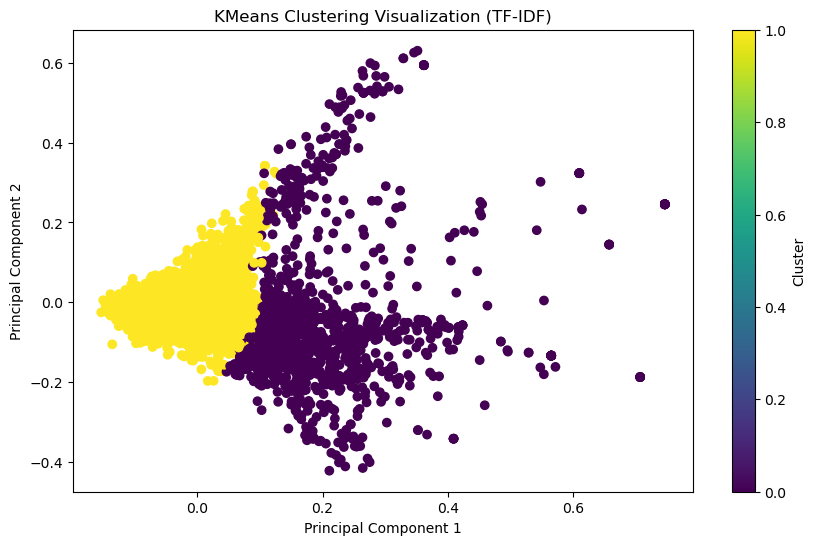

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/76263465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'cluster_{title}'] = clusters


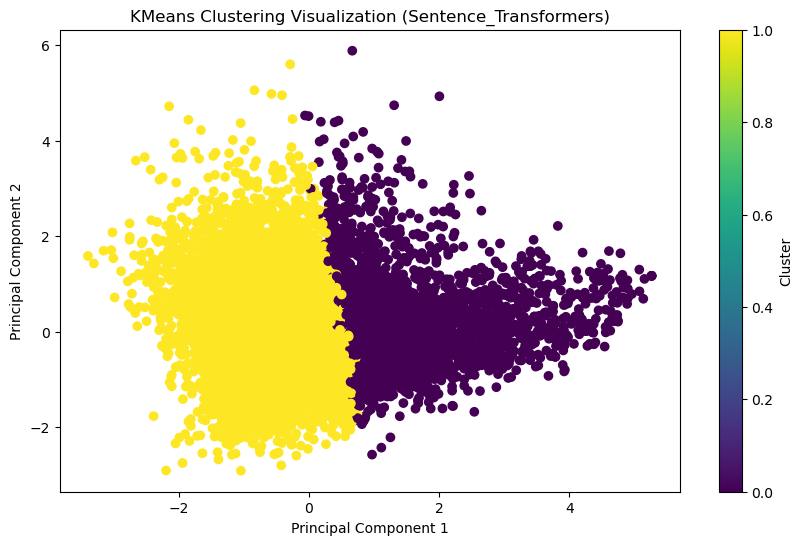

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/76263465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'cluster_{title}'] = clusters


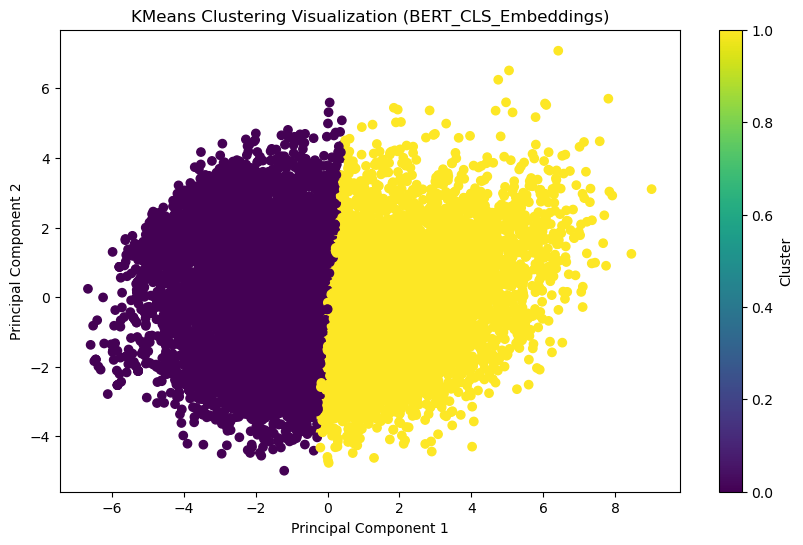

In [101]:
# Add cluster labels to the dataframe for each embedding method

import matplotlib.pyplot as plt

# Function to perform KMeans clustering and visualize the data
def kmeans_clustering_and_visualization(data, num_clusters=2, title=''):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    df_filtered[f'cluster_{title}'] = clusters
    # Perform PCA to reduce dimensions for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title(f'KMeans Clustering Visualization ({title})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Perform clustering and visualization on X
kmeans_clustering_and_visualization(X, num_clusters=2, title='TF-IDF')

# Perform clustering and visualization on X_transformers
kmeans_clustering_and_visualization(X_transformers, num_clusters=2, title='Sentence_Transformers')

# Perform clustering and visualization on X_cls_bert
kmeans_clustering_and_visualization(X_cls_bert, num_clusters=2, title='BERT_CLS_Embeddings')

In [103]:
# Create a new column 'opposition_proposition' where 1 indicates opposition and 0 indicates proposition
df_filtered['opposition_proposition'] = df_filtered['party'].apply(lambda x: 1 if x in ['Konfa', 'PIS'] else 0)

# Calculate the correlation between 'opposition_proposition' and 'cluster'
correlation = df_filtered['opposition_proposition'].corr(df_filtered['cluster_TF-IDF'])
correlation1 = df_filtered['opposition_proposition'].corr(df_filtered['cluster_Sentence_Transformers'])
correlation2 = df_filtered['opposition_proposition'].corr(df_filtered['cluster_BERT_CLS_Embeddings'])
correlation3 = df_filtered['opposition_proposition'].corr(df_filtered['cluster'])

print(f"Correlation between clusters and opposition/proposition: {correlation}")
print(f"Correlation between clusters and opposition/proposition: {correlation1}")
print(f"Correlation between clusters and opposition/proposition: {correlation2}")
print(f"Correlation between clusters and opposition/proposition: {correlation3}")

Correlation between clusters and opposition/proposition: 0.11507146525445289
Correlation between clusters and opposition/proposition: 0.14946047000550752
Correlation between clusters and opposition/proposition: 0.06324956589519347
Correlation between clusters and opposition/proposition: 0.1914493272387513


/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/839279828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['opposition_proposition'] = df_filtered['party'].apply(lambda x: 1 if x in ['Konfa', 'PIS'] else 0)


Zadania
Mati - uporządkować pliki 
     - sentyment reply, quote vs original
     - pokomentować
Łukasz - sprawdzic nowego berta